In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration


model_id = "google/paligemma-3b-pt-224"  # or any other specific PaliGemma model ID
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
import requests
from PIL import Image
import torch
import matplotlib.pyplot as plt
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA available: True
Device name: NVIDIA GeForce RTX 4080 SUPER


Using device: cuda


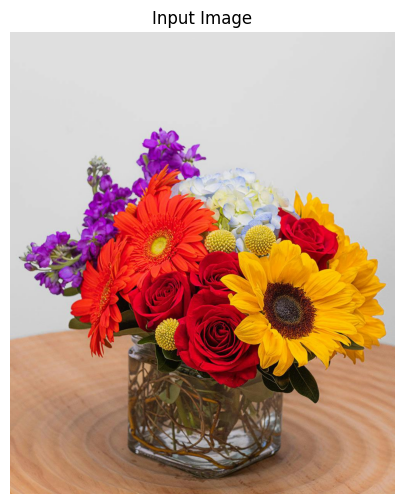



 What is the name of the flowers in this picture?


sunflowers roses and hydrangeas arranged in a clear glass vase on a wooden table with a white wall in the background and copy space on the left side of the image

In [17]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move model to GPU
model = model.to(device)

image_file = "https://peoplesflowers.imgix.net/images/itemVariation/boldnbeautiful-24090921806.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Define the question
question = """

<image> What is the name of the flowers in this picture?

"""

# Move inputs to GPU
inputs = processor(images=raw_image, text=question, return_tensors="pt").to(device)

# Generate the answer with GPU acceleration
outputs = model.generate(
    **inputs,
    max_new_tokens=100,       # Allow more tokens for a detailed response
    do_sample=False,          # Disable sampling for deterministic output
    temperature=0.5,          # Reduce temperature for less random answers
    top_p=0.98,               # Increase top-p for wider consideration of options
    num_beams=10,             # Increase beams for a more exhaustive search
    length_penalty=1.5,       # Encourage moderately longer sentences
    repetition_penalty=1.1    # Lightly penalize repetition for more natural output
)

# Decode and print the answer
answer = processor.decode(outputs[0], skip_special_tokens=True)
from IPython.display import display_markdown
display_markdown(answer, raw=True)

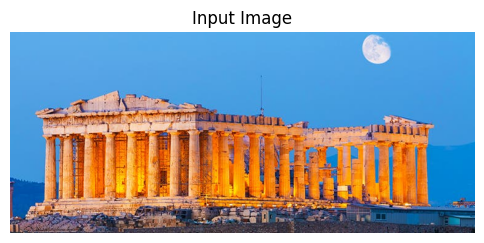


    " Describe the scene in the image."


The Parthenon at dusk with the moon in the sky above it. The Parthenon was built in the 5th century B.C. and is one of the seven wonders of the ancient world. It is a temple dedicated to Athena, the goddess of wisdom and warfare. It is located in the southern part of the city of Athens, Greece. The Parthenon is made of marble and is 16.5 meters high and 12.5 meters wide. It was built during the 5th century B.C. and is one of the seven wonders of the ancient world. It is a temple dedicated to Athena, the goddess of wisdom and warfare. It is located in the southern part of the city of Athens, Greece. The Parthenon is made of marble and is 16.5 meters high and 12.5 meters wide. It was built during the 5th century B.C. and is one of the seven wonders of the ancient world

In [6]:
image_file = "https://www.exoticca.com/_next/image?url=https%3A%2F%2Fuploads.exoticca.com%2Fglobal%2Fdestination%2Fpoi%2Fparthenon.png&w=3840&q=75"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Define the question
question = """
    "<image> Describe the scene in the image."

"""

# Move inputs to GPU
inputs = processor(images=raw_image, text=question, return_tensors="pt").to(device)

# Generate the answer with GPU acceleration
outputs = model.generate(
    **inputs,
    max_new_tokens=200,       # Allow more tokens for detailed output
    do_sample=True,           # Enable sampling
    temperature=0.7,          # Sampling temperature for diversity
    top_p=0.95,               # Top-p sampling for nucleus sampling
    num_beams=5,              # Beam search for structured output
    length_penalty=2.0,       # Encourage longer sentences
    repetition_penalty=1.3    # Penalize repetitive text
)

# Decode and print the answer
answer = processor.decode(outputs[0], skip_special_tokens=True)
from IPython.display import display_markdown
display_markdown(answer, raw=True)

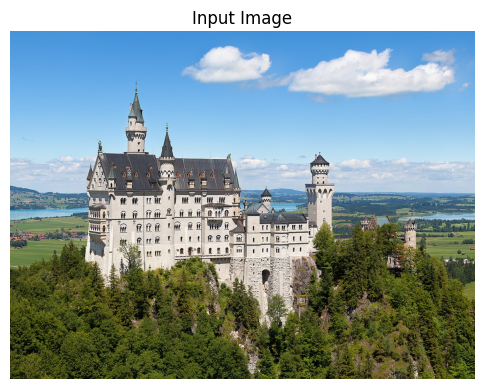


    " Here is a image of Neuschwanstein Castle. Where is it located?"


"Neuschwanstein Castle is located in Bavaria, Germany. It was built between 1891 and 1898. It is one of the most famous castles in the world. It was built to look like a real-life castle from a fairy tale. The castle was built to look like a real-life castle from a fairy tale. It was built between 1891 and 1898. It was built to look like a real-life castle from a fairy tale. It was built between 1891 and 1898. It was built to look like a real-life castle from a fairy tale. It was built between 1891 and 1898. It was built to look like a real-life castle from a fairy tale. It was built between 1891 and 1898. It was built to look like a real-life castle from a

In [7]:
image_file = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Schloss_Neuschwanstein_2013.jpg/1200px-Schloss_Neuschwanstein_2013.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Define the question
question = """
    "<image> Here is a image of Neuschwanstein Castle. Where is it located?"

"""

# Move inputs to GPU
inputs = processor(images=raw_image, text=question, return_tensors="pt").to(device)

# Generate the answer with GPU acceleration
outputs = model.generate(
    **inputs,
    max_new_tokens=200,       # Allow more tokens for detailed output
    do_sample=True,           # Enable sampling
    temperature=0.7,          # Sampling temperature for diversity
    top_p=0.95,               # Top-p sampling for nucleus sampling
    num_beams=5,              # Beam search for structured output
    length_penalty=2.0,       # Encourage longer sentences
)

# Decode and print the answer
answer = processor.decode(outputs[0], skip_special_tokens=True)
from IPython.display import display_markdown
display_markdown(answer, raw=True)

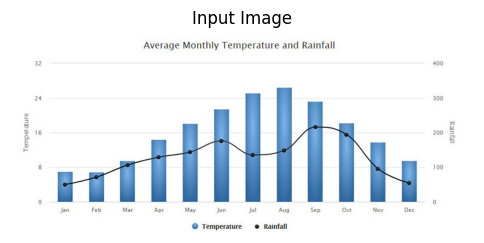


    " What does the chart in the image represent and what are the key takeaways?"


Average Monthly Temperature and Rainfall

In [15]:
image_file = "https://wpdatatables.com/wp-content/uploads/2020/08/chart5.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Define the question
question = """
    "<image> What does the chart in the image represent and what are the key takeaways?"

"""

# Move inputs to GPU
inputs = processor(images=raw_image, text=question, return_tensors="pt").to(device)

# Generate the answer with GPU acceleration
outputs = model.generate(
    **inputs,
    max_new_tokens=200,       # Allow more tokens for detailed output
    do_sample=True,           # Enable sampling
    temperature= 0.1,          # Sampling temperature for diversity
    top_p=0.95,               # Top-p sampling for nucleus sampling
    num_beams=5,              # Beam search for structured output
)

# Decode and print the answer
answer = processor.decode(outputs[0], skip_special_tokens=True)
from IPython.display import display_markdown
display_markdown(answer, raw=True)

In [ ]:
image_file = "https://slideuplift.com/wp-content/uploads/2020/06/Recruitment-Tracker-04-PowerPoint-Template-390829-768x432.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(raw_image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Define the question
question = """
    "<image> Your task is to describe the image and provide a detailed summary. Do not add any additional information."

"""

# Move inputs to GPU
inputs = processor(images=raw_image, text=question, return_tensors="pt").to(device)

# Generate the answer with GPU acceleration
outputs = model.generate(
    **inputs,
    max_new_tokens=200,       # Allow more tokens for detailed output
    do_sample=True,           # Enable sampling
    temperature= 0.1,          # Sampling temperature for diversity
    top_p=0.95,               # Top-p sampling for nucleus sampling
    num_beams=5,              # Beam search for structured output
)

# Decode and print the answer
answer = processor.decode(outputs[0], skip_special_tokens=True)
from IPython.display import display_markdown
display_markdown(answer, raw=True)